# Shapes Detection

In [2]:
import cv2
import numpy as np
# import cv2.cv as cv
%matplotlib inline
import matplotlib.pyplot as plt

## Line Detection 

### Hough transform
* In this transform, go from image space (X, Y) to Hough space (m,b or slope, intercept). 
* A line in image space is a point in Hough space. 
* Parallel lines have the same slope, which is to say, the same “m” parameter in our line model. So, in parameter space, two parallel lines would be represented by two points at the same m value, but different b values.
* A point in image space describes a line in Hough space. So a line in an image is a point in Hough space and a point in an image is a line in Hough space. 
* Two points in image space correspond to two lines in Hough Space. Not only that, but these lines must intersect.


**cv2.HoughLines**(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)
- Threshold here is the minimum vote for it to be considered a line

In [2]:
def hough_lines(img, rho, theta, threshold):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLines(img, rho, theta, threshold)
    # print("Hough lines: ", lines)
    line_img = np.zeros(img.shape, dtype=np.uint8)
    for line in lines:
        for rho, theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return line_img

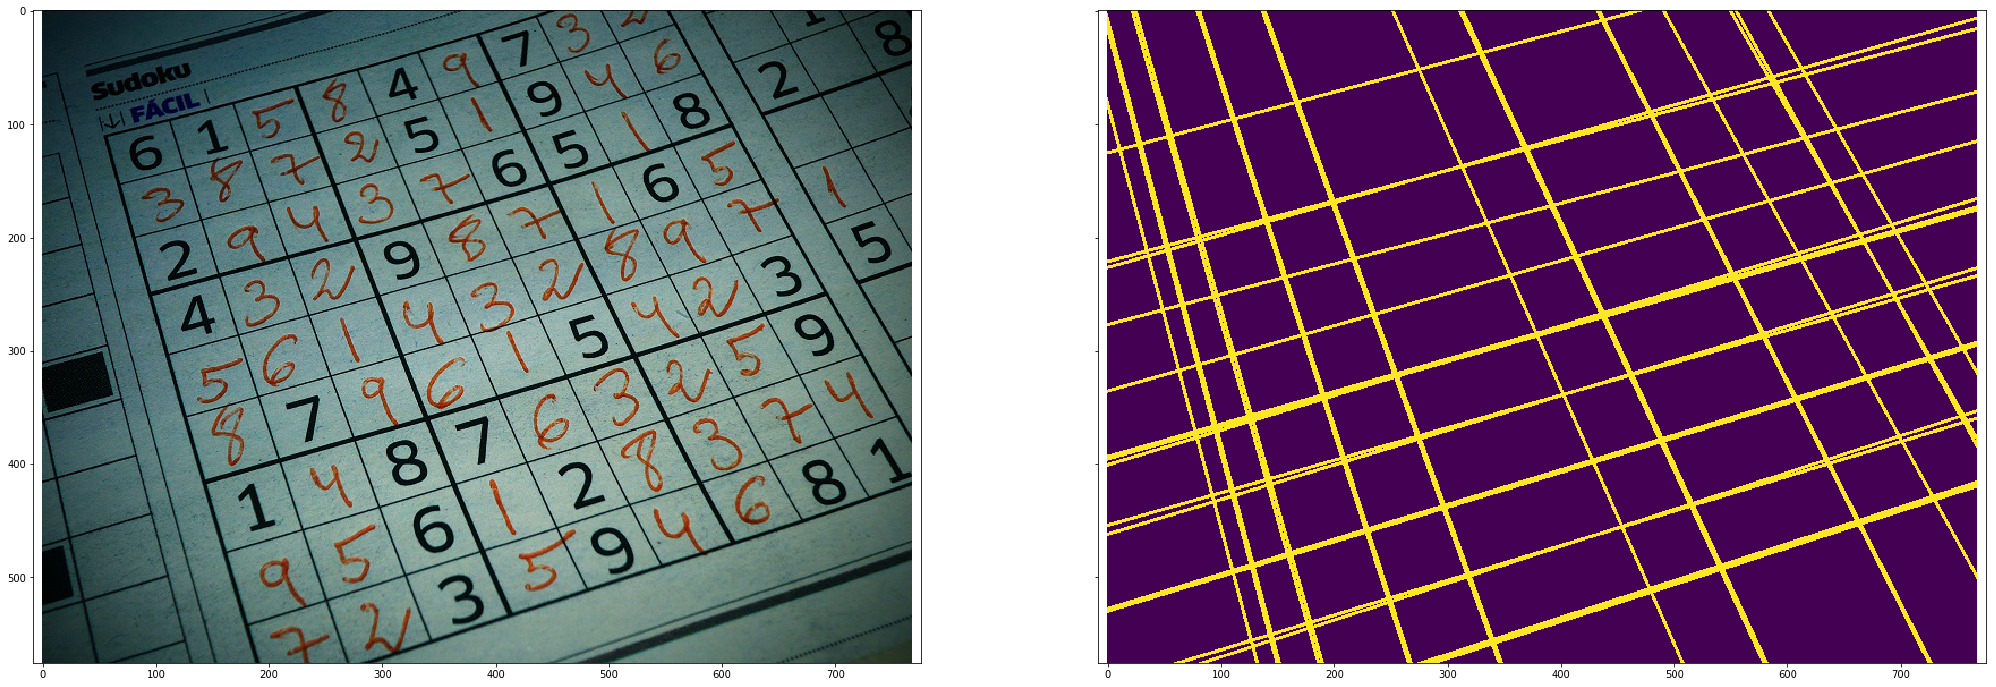

In [3]:
image = cv2.imread('images/soduku.jpg')

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

# Hough lines
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 240     # minimum number of votes (intersections in Hough grid cell)

line_img = hough_lines(edges, rho, theta, threshold)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
#lines = cv2.HoughLines(edges, 1, np.pi / 180, 300)

# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)

f, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(35,12))
ax[0].imshow(image)
ax[1].imshow(line_img)
plt.show()

## Circle:
A circle is represented mathematically as $ (x-x_{center})^2 + (y - y_{center})^2 = r^2$ where $(x_{center},y_{center})$ is the center of the circle, and r is the radius of the circle. From equation, we can see we have 3 parameters, so we need a 3D accumulator for hough transform, which would be highly ineffective. So OpenCV uses more trickier method, Hough Gradient Method which uses the gradient information of edges.

** cv2.HoughCircles(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)**
* Method - currently only cv2.HOUGH_GRADIENT available
* dp - Inverse ratio of accumulator resolution
* MinDist - the minimum distance between the center of detected circles
* param1 - Gradient value used in the edge detection
* param2 - Accumulator threshold for the HOUGH_GRADIENT method, lower allows more circles to be detected (false positives)
* minRadius - limits the smallest circle to this size (via radius)
* MaxRadius - similarly sets the limit for the largest circles


In [4]:
def hough_circles(img, dp, MinDist,minRadius):
    
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 5)
    circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp ,MinDist , minRadius = minRadius)

    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(img,(i[0], i[1]), i[2], (0, 255, 0), 6)
        
        # draw the center of the circle
        #cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 5)
    return img

Detecting the circles is handled by the cv2.HoughCircles function. We pass in the image we want to detect circles as the first argument, the circle detection method as the second argument, an accumulator value of 1.5 as the third argument, and finally a minDist of 100 pixels.

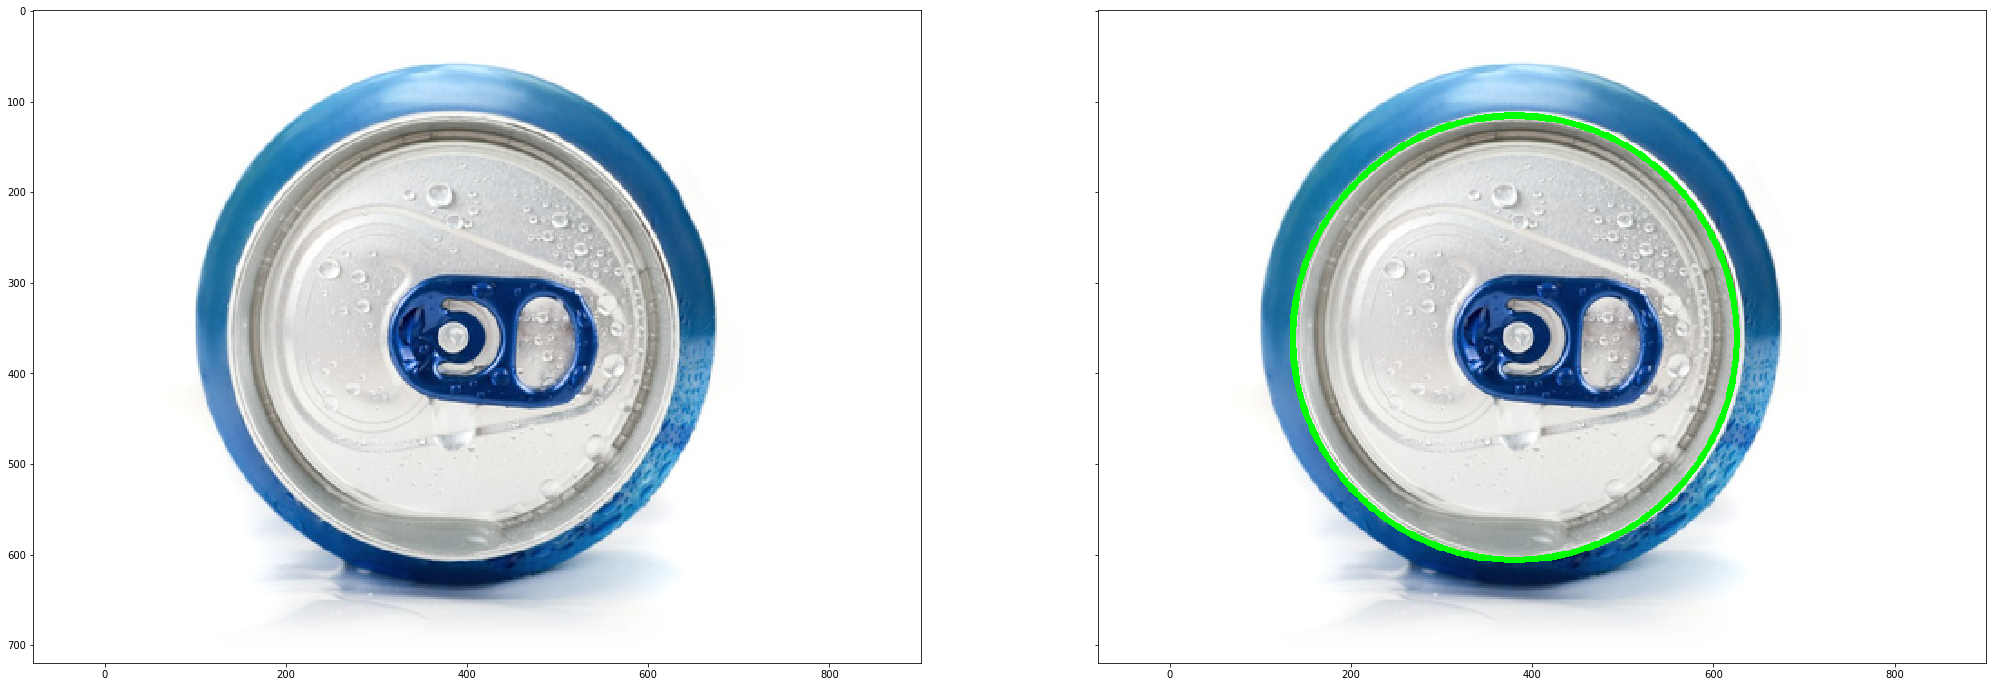

In [5]:
image = cv2.imread('images/detect_circles_soda.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

dp=  1.2
MinDist=  100
minRadius = 215
image_Circle = hough_circles(image.copy(), dp, MinDist,minRadius)
f, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(35,12))
ax[0].imshow(image)
ax[1].imshow(image_Circle)
plt.show()

#circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
 #                           param1=50,param2=30,minRadius=0,maxRadius=0)


## Blob Detection:

A Blob is a group of connected pixels in an image that share some common property ( E.g grayscale value ). OpenCV provides a convenient way to detect blobs and filter them based on different characteristics

How we use OpenCV's simpleBlobDetector?
1. Create Detector
2. Input image into Detector
3. Obtain Key points
4. Draw Key points

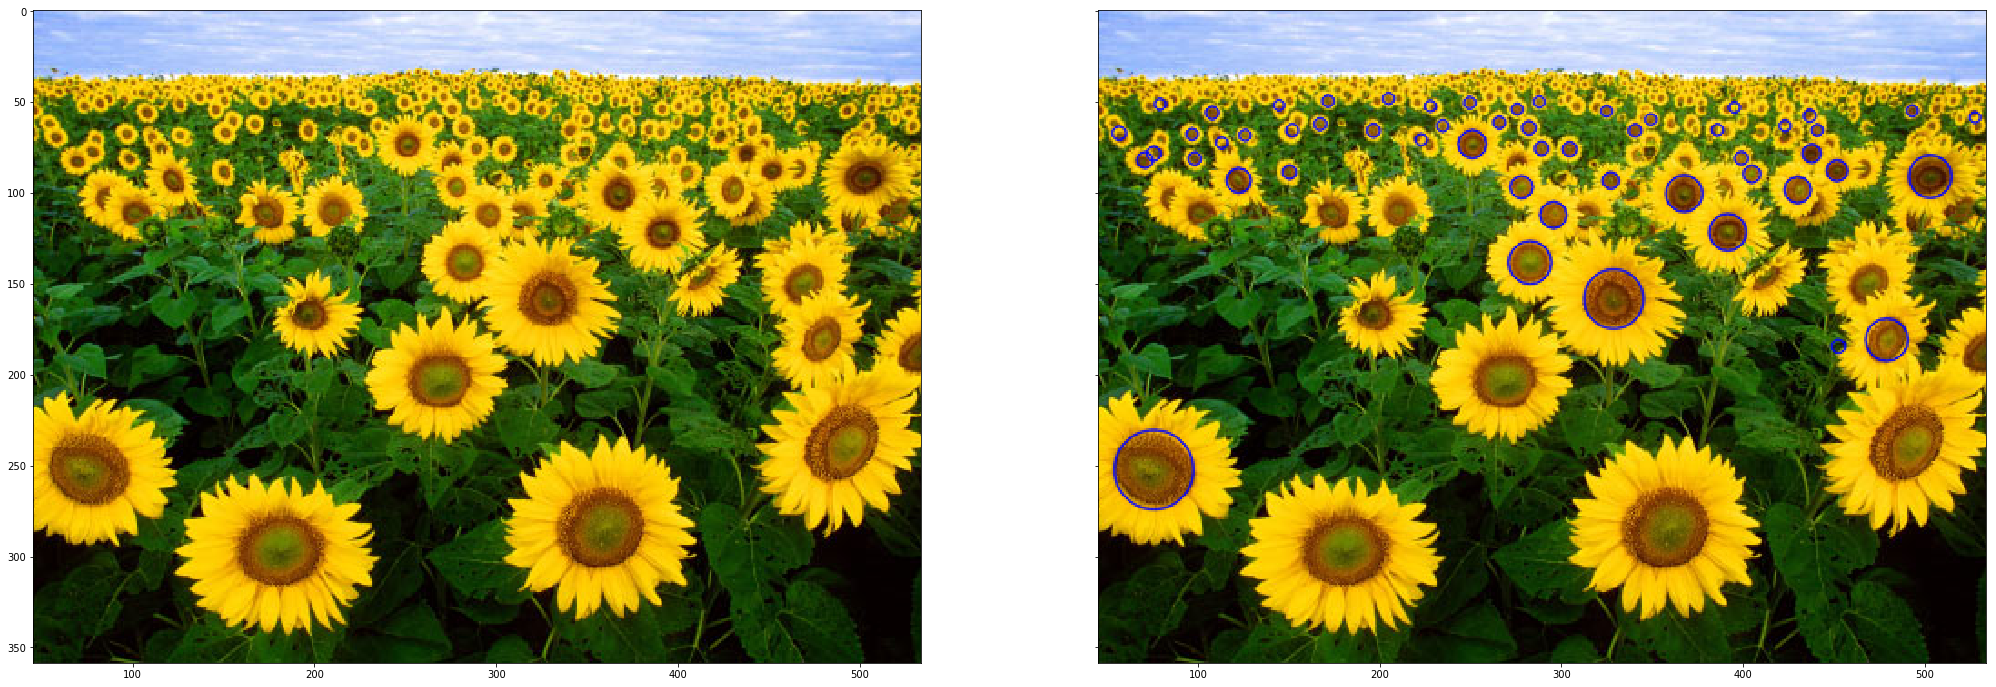

In [6]:
# Read image
image = cv2.imread("images/Sunflowers.jpg",cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(gray)
 
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(image.copy(), keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Draw detected blobs as blue circles.
f, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(35,12))
ax[0].imshow(image)
ax[1].imshow(im_with_keypoints)
plt.show()


## Example: Counting Circles and Elipses:
### Filtering Blobs by Color, Size and Shape

* **By Size** :   You can filter the blobs based on size by setting the parameters filterByArea = 1, and appropriate values for minArea  and maxArea. E.g.  setting minArea  = 100 will filter out all the blobs that have less then 100 pixels.

* ** By Shape** : Now shape has three different parameters.
   * **Circularity** :  This just measures how close to a circle the blob is. E.g. a regular hexagon has higher circularity than say a square. To filter by circularity, set filterByCircularity = 1.  Then set appropriate values for minCircularity and maxCircularity.  Circularity is defined as (\frac{4*\pi*Area}{perimeter * perimeter}). This means that a circle has a circularity of 1, circularity of a square is 0.785, and so on.
   * **Convexity** : Convexity is defined as the (Area of the Blob / Area of it’s convex hull). Now, Convex Hull of a shape is the tightest convex shape that completely encloses the shape.  To filter by convexity, set filterByConvexity = 1, followed by setting 0 ≤ minConvexity ≤ 1 and maxConvexity ( ≤ 1) 
   * **Inertia Ratio** : measures how elongated a shape is. E.g. for a circle, this value is 1, for an ellipse it is between 0 and 1, and for a line it is 0. To filter by inertia ratio, set filterByInertia = 1, and set 0 ≤ minInertiaRatio ≤ 1 and maxInertiaRatio (≤ 1 ) appropriately. 
   
ref: http://www.learnopencv.com/blob-detection-using-opencv-python-c/

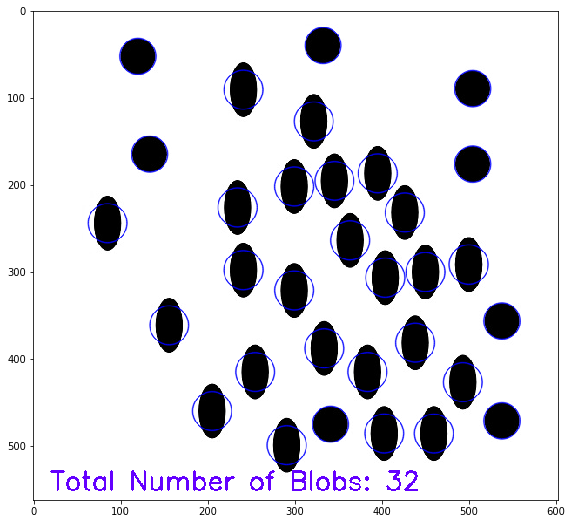

In [10]:
# Load image
image = cv2.imread("images/blobs.jpg", 0)

# Intialize the detector using the default parameters
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs
keypoints = detector.detect(image)
 
# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
plt.figure(figsize = (12,9))
plt.imshow(blobs)
plt.show()

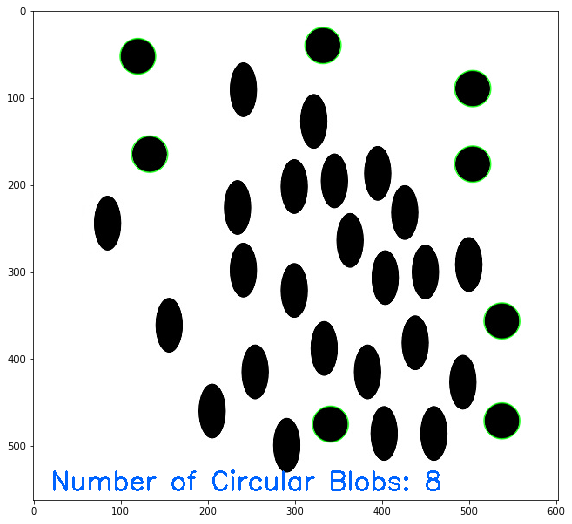

In [14]:

# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2
    
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
    
# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
plt.figure(figsize = (12,9))
plt.imshow(blobs)
plt.show()